In [1]:
#pip install pgmpy

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

# Definindo a estrutura da rede
model = BayesianNetwork([('Emprego', 'Renda_Mensal'),
                         ('Emprego', 'Risco'),
                         ('Renda_Mensal', 'Dividas'),
                         ('Renda_Mensal', 'Historico_Credito'),
                         ('Historico_Credito', 'Risco'),
                         ('Dividas', 'Risco')])

# CPD (distribuições de probabilidade condicionais) para o booleano Emprego; 
# Variable card = Num de níveis ([sim, não]; [Baixo, médio, alto]; etc)
cpd_emprego = TabularCPD(variable='Emprego', variable_card=2, values=[[0.3], [0.7]], state_names={'Emprego': ['Desempregado', 'Empregado']})

# CPD para Renda_Mensal (depende de Emprego);  values[0]=[Desempregado, Empregado]
cpd_renda_mensal = TabularCPD(variable='Renda_Mensal', variable_card=3, values=[[0.95, 0.5], [0.03, 0.4], [0.02, 0.1]],
                              evidence=['Emprego'], evidence_card=[2], 
                              state_names={
                                  'Emprego': ['Desempregado', 'Empregado'], 
                                  'Renda_Mensal': ['Baixa', 'Media', 'Alta']
                              })


In [4]:
print(cpd_renda_mensal)

+---------------------+-----------------------+--------------------+
| Emprego             | Emprego(Desempregado) | Emprego(Empregado) |
+---------------------+-----------------------+--------------------+
| Renda_Mensal(Baixa) | 0.95                  | 0.5                |
+---------------------+-----------------------+--------------------+
| Renda_Mensal(Media) | 0.03                  | 0.4                |
+---------------------+-----------------------+--------------------+
| Renda_Mensal(Alta)  | 0.02                  | 0.1                |
+---------------------+-----------------------+--------------------+


In [5]:
# CPDs hipotéticas para os outros nós; 
cpd_historico_credito = TabularCPD(variable='Historico_Credito', variable_card=3, values=[[0.6, 0.4, 0.2], [0.3, 0.4, 0.5], [0.1, 0.2, 0.3]],
                                   evidence=['Renda_Mensal'], evidence_card=[3],
                                      state_names={
                                      'Renda_Mensal': ['Baixa', 'Media', 'Alta'], 
                                      'Historico_Credito': ['Ruim', 'Bom', 'Otimo']
                                     }
                                  )


In [6]:
print(cpd_historico_credito)

+--------------------------+---------------------+---------------------+--------------------+
| Renda_Mensal             | Renda_Mensal(Baixa) | Renda_Mensal(Media) | Renda_Mensal(Alta) |
+--------------------------+---------------------+---------------------+--------------------+
| Historico_Credito(Ruim)  | 0.6                 | 0.4                 | 0.2                |
+--------------------------+---------------------+---------------------+--------------------+
| Historico_Credito(Bom)   | 0.3                 | 0.4                 | 0.5                |
+--------------------------+---------------------+---------------------+--------------------+
| Historico_Credito(Otimo) | 0.1                 | 0.2                 | 0.3                |
+--------------------------+---------------------+---------------------+--------------------+


In [7]:
cpd_dividas = TabularCPD(variable='Dividas', variable_card=3, values=[[0.1, 0.3, 0.5], [0.3, 0.3, 0.3], [0.6, 0.4, 0.2]],
                         evidence=['Renda_Mensal'], evidence_card=[3],
                        state_names={
                                      'Renda_Mensal': ['Baixa', 'Media', 'Alta'], 
                                      'Dividas': ['Nenhuma', 'Pouca', 'Alta']
                                     })

In [8]:
print(cpd_dividas)

+------------------+---------------------+---------------------+--------------------+
| Renda_Mensal     | Renda_Mensal(Baixa) | Renda_Mensal(Media) | Renda_Mensal(Alta) |
+------------------+---------------------+---------------------+--------------------+
| Dividas(Nenhuma) | 0.1                 | 0.3                 | 0.5                |
+------------------+---------------------+---------------------+--------------------+
| Dividas(Pouca)   | 0.3                 | 0.3                 | 0.3                |
+------------------+---------------------+---------------------+--------------------+
| Dividas(Alta)    | 0.6                 | 0.4                 | 0.2                |
+------------------+---------------------+---------------------+--------------------+


In [9]:
cpd_risco = TabularCPD(variable='Risco', variable_card=2, values=[
 [0.3, 0.2, 0.0, 0.65, 0.6, 0.5, 0.8, 0.75, 0.6, 0.4, 0.2, 0.1, 0.9, 0.7, 0.5, 1.0, 0.9, 0.7], 
 [0.7, 0.8, 1.0, 0.35, 0.4, 0.5, 0.2, 0.25, 0.4, 0.6, 0.8, 0.9, 0.1, 0.3, 0.5, 0.0, 0.1, 0.3]
 ] ,
                       evidence=['Emprego', 'Historico_Credito', 'Dividas'], evidence_card=[2, 3, 3],
                      state_names={
                                      'Emprego': ['Desempregado', 'Empregado'], 
                                      'Historico_Credito': ['Ruim', 'Bom', 'Otimo'],
                                      'Dividas': ['Nenhuma', 'Pouca', 'Alta'],
                                      'Risco':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
                                 }
                      )

In [10]:
print(cpd_risco)

+-------------------+-------------------------+-----+--------------------------+--------------------------+
| Emprego           | Emprego(Desempregado)   | ... | Emprego(Empregado)       | Emprego(Empregado)       |
+-------------------+-------------------------+-----+--------------------------+--------------------------+
| Historico_Credito | Historico_Credito(Ruim) | ... | Historico_Credito(Otimo) | Historico_Credito(Otimo) |
+-------------------+-------------------------+-----+--------------------------+--------------------------+
| Dividas           | Dividas(Nenhuma)        | ... | Dividas(Pouca)           | Dividas(Alta)            |
+-------------------+-------------------------+-----+--------------------------+--------------------------+
| Risco(1)          | 0.3                     | ... | 0.9                      | 0.7                      |
+-------------------+-------------------------+-----+--------------------------+--------------------------+
| Risco(2)          | 0.7   

In [11]:
# Adicionando CPDs ao modelo
model.add_cpds(cpd_emprego, cpd_renda_mensal, cpd_historico_credito, cpd_dividas, cpd_risco)

# Verificando a consistência do modelo
assert model.check_model()

# Realizando a inferência
infer = VariableElimination(model)

# Calculando a probabilidade marginal para o Risco, dado Historico_Credito='Bom' e Emprego='Desempregado'
result = infer.query(variables=['Risco'],
                     evidence={'Historico_Credito': 'Bom', 
                               'Emprego': 'Desempregado'},
 )

# Imprimindo o resultado
print(result)


+----------+--------------+
| Risco    |   phi(Risco) |
+==========+==============+
| Risco(1) |       0.5481 |
+----------+--------------+
| Risco(2) |       0.4519 |
+----------+--------------+


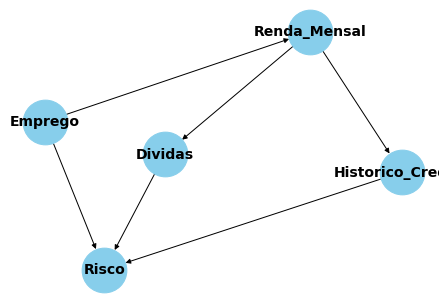

In [76]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_bayesian_network(model):
    # Cria um objeto DiGraph do NetworkX a partir do modelo da pgmpy
    nx_graph = nx.DiGraph()
    nx_graph.add_edges_from(model.edges())

    # Desenha a rede
    pos = nx.spring_layout(nx_graph)  # Você pode mudar o layout conforme sua preferência
    nx.draw(nx_graph, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=14, font_weight='bold')
    plt.show()

# Chamando a função com o modelo como argumento
draw_bayesian_network(model)

Renda Mensal afeta Dívida Atual e Histórico de Crédito.<br>
Histórico de Crédito afeta o Risco de Empréstimo.<br>
Emprego afeta a Renda Mensal e o Risco de Empréstimo.<br>
Dívida Atual afeta o Risco de Empréstimo.<br>

distribuições de probabilidade condicionais